In [1]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Describe train
train_data

,physical_part_type,message_timestamp,weekday,shift,status,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
0,type1,2024-09-01 22:05:44,Sunday,Nachtschicht,OK,gAAAAABnRuZgg4Kol8URwnouW9Hv5RymnFqydE_5oyUU_3...,4606.469076,19.525688,374.198570,8858.706709,...,116.978698,25845.838372,NaN,210.307587,158.979496,35265.817888,217.244319,0.0,727.488871,28.207390
1,type2,2024-09-01 22:07:29,Sunday,Nachtschicht,OK,gAAAAABnRuZfvjtCL7qj_QEGC47fSq-n7brsZXoEV--vJ1...,5886.043819,17.540378,360.603884,8851.987083,...,133.967306,NaN,NaN,204.013170,157.362755,34114.280978,225.185946,0.0,741.645333,25.441928
2,type1,2024-09-01 22:07:55,Sunday,Nachtschicht,OK,gAAAAABnRuZfuXBrn_3FsgN6QXP6DQZPeVgP17o6yPbv4h...,4606.469076,20.445584,371.689206,8856.466834,...,155.401053,25845.838372,NaN,184.667093,NaN,35049.904717,223.404646,0.0,721.249812,25.441928
3,type1,2024-09-01 22:08:38,Sunday,Nachtschicht,OK,gAAAAABnRuZheONxFxB3r6dyfTZt1ehdUXm6a-9Opa35i4...,4606.469076,20.822377,372.461318,8854.226959,...,108.880369,25845.838372,NaN,195.774888,NaN,33682.454636,219.470943,0.0,716.725583,26.253564
4,type1,2024-09-01 22:08:56,Sunday,Nachtschicht,OK,gAAAAABnRuZiqnRUJiO7HqQmkkVmg-m21um0EcSExrMdud...,4606.469076,18.592800,373.371307,8851.987083,...,115.292611,25845.838372,NaN,174.577513,154.129274,34546.107319,240.178550,0.0,775.029771,21.271151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44813,type2,2024-11-25 00:50:58,Monday,Nachtschicht,OK,gAAAAABnRuZi5jnV3tyBhqZJ5wT0_a9MxZxEA7mGq_P1im...,5886.043819,19.411351,352.800037,8887.825088,...,173.488172,NaN,NaN,NaN,161.674064,31883.178213,NaN,0.0,813.631668,24.508053
44814,type2,2024-11-25 00:53:59,Monday,Nachtschicht,OK,gAAAAABnRuZf8bCkDO6ZE8b28qWk60DyoNY0wOltoORs0l...,5886.043819,17.181774,336.861440,8892.304838,...,170.805760,NaN,NaN,NaN,154.668187,32027.120327,NaN,0.0,805.203466,23.274894
44815,type1,2024-11-25 00:55:16,Monday,Nachtschicht,OK,gAAAAABnRuZfeD4r4QlWL4sQ9laHYGpg_mg1Mf1e_SeU_6...,4606.469076,17.298710,350.345824,8887.825088,...,174.535590,25845.838372,NaN,NaN,164.368631,32243.033498,NaN,0.0,778.897258,25.138601
44816,type2,2024-11-25 00:56:10,Monday,Nachtschicht,NOK,gAAAAABnRuZgYrpsqvS8pHeiYtpnflcQQb55_vGOikB2du...,5886.043819,19.541280,361.348420,8885.585212,...,172.313020,NaN,NaN,NaN,159.518409,33394.570408,NaN,0.0,728.546957,22.790479


In [2]:
# Show types of features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44818 entries, 0 to 44817
Columns: 376 entries, physical_part_type to s3_sensor3_newtonmeter_step1
dtypes: float64(370), object(6)
memory usage: 128.6+ MB


<Axes: >

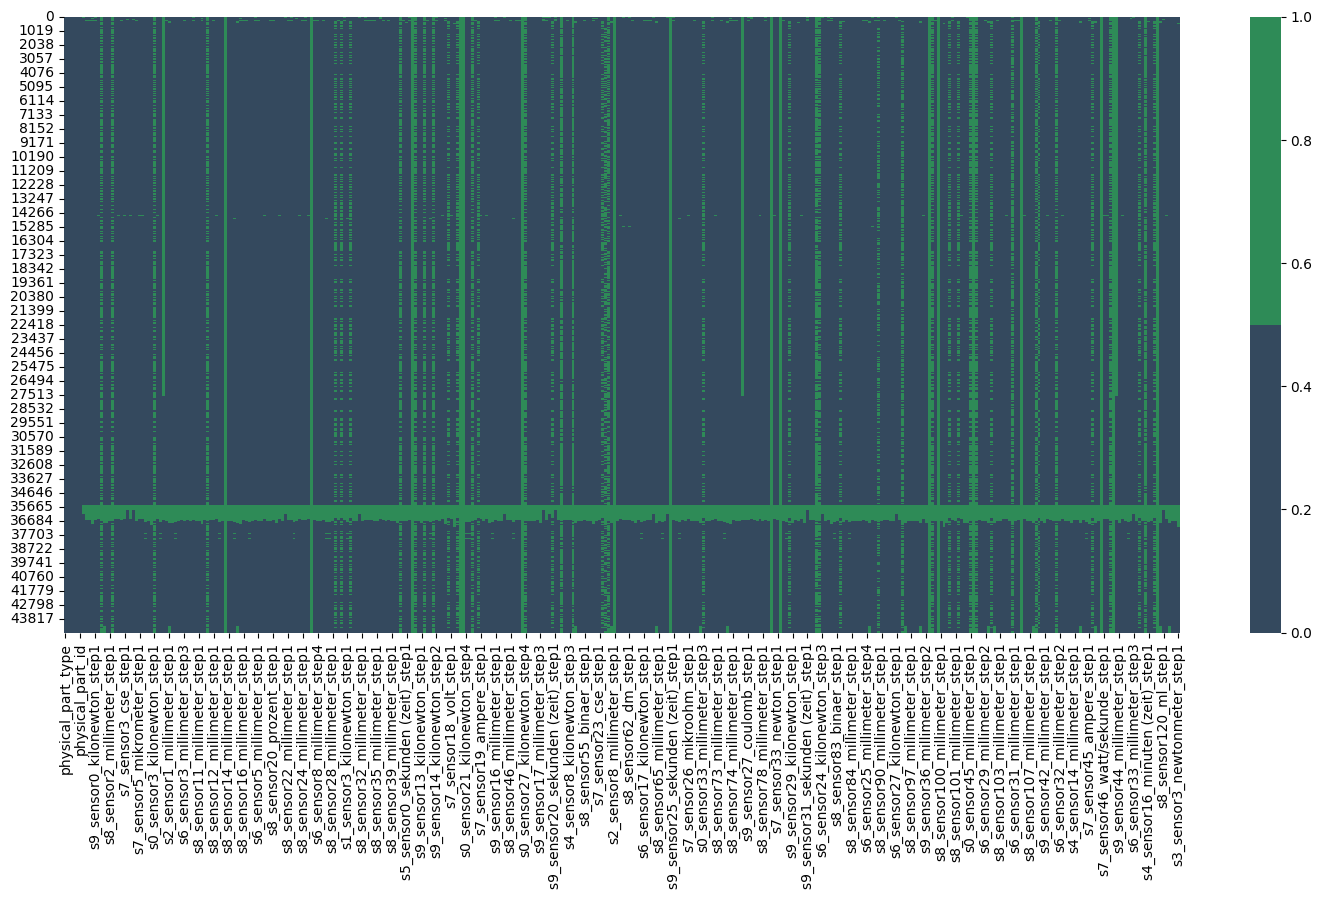

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(train_data.isnull(), cmap=sns.color_palette(colours))

In [4]:
# Check if all rows are unique in physical_part_id
print(train_data["physical_part_id"].nunique())
print(len(train_data))

# Check how many unique has shift
print(train_data["shift"].nunique())


44818
44818
3


In [5]:
import numpy as np
import pandas as pd

# Assuming train_data is your DataFrame
df = train_data

# Step 1: One-Hot Encoding for 'physical_part_type'
df = pd.get_dummies(df, columns=['physical_part_type'], drop_first=True)

# Step 2: Convert 'message_timestamp' to seconds since epoch
df['message_timestamp'] = pd.to_datetime(df['message_timestamp'])
df['message_timestamp'] = df['message_timestamp'].astype(np.int64) // 10**9  # Convert to seconds since epoch

# Step 3: Cyclic Encoding for 'weekday'
# Map weekday names to numerical values (Sunday = 0, Monday = 1, ..., Saturday = 6)
weekday_map = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
               'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df['weekday'] = df['weekday'].map(weekday_map)

# Cyclic encoding for weekday
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

# Step 4: Cyclic Encoding for 'shift'
# Map shifts to numerical values (Fruehschicht = 0, Spaetschicht = 1, Nachtschicht = 2)
shift_map = {'Fruehschicht': 0, 'Spaetschicht': 1, 'Nachtschicht': 2}
df['shift'] = df['shift'].map(shift_map)

# Cyclic encoding for shift (3 unique shifts)
df['shift_sin'] = np.sin(2 * np.pi * df['shift'] / 3)
df['shift_cos'] = np.cos(2 * np.pi * df['shift'] / 3)

# Step 5: Remove 'physical_part_id' column
df = df.drop(columns=['physical_part_id', 'weekday', 'shift'])


In [6]:
# Step 1: Convert 'status' to binary (0 for OK, 1 for NOK)
df['status'] = df['status'].map({'OK': 1, 'NOK': 0})

# Show types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44818 entries, 0 to 44817
Columns: 378 entries, message_timestamp to shift_cos
dtypes: bool(2), float64(374), int64(2)
memory usage: 128.7 MB


In [7]:
df = df.dropna(axis=1, how='all')

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=1, random_state=0)

# Fit and transform the data (result will be a NumPy array)
df_imputed_array = imputer.fit_transform(df)

# Convert the NumPy array back to DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
df = df_imputed
nan_exists = df.isnull().any().any() 
nan_exists

False

In [10]:
df

,message_timestamp,status,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,...,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,physical_part_type_type2,physical_part_type_type4,weekday_sin,weekday_cos,shift_sin,shift_cos
0,1.725228e+09,1.0,4606.469076,19.525688,374.198570,8858.706709,36.836737,28705.766208,-53.537243,18.009638,...,217.244319,0.0,727.488871,28.207390,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
1,1.725228e+09,1.0,5886.043819,17.540378,360.603884,8851.987083,36.836737,27013.209239,-53.537243,20.258647,...,225.185946,0.0,741.645333,25.441928,1.0,0.0,0.000000,1.00000,-0.866025,-0.5
2,1.725228e+09,1.0,4606.469076,20.445584,371.689206,8856.466834,36.836737,33241.818888,-53.537243,18.686098,...,223.404646,0.0,721.249812,25.441928,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
3,1.725229e+09,1.0,4606.469076,20.822377,372.461318,8854.226959,36.836737,32564.796100,-53.537243,15.347726,...,219.470943,0.0,716.725583,26.253564,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
4,1.725229e+09,1.0,4606.469076,18.592800,373.371307,8851.987083,36.836737,32835.605215,-53.537243,21.242588,...,240.178550,0.0,775.029771,21.271151,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44813,1.732496e+09,1.0,5886.043819,19.411351,352.800037,8887.825088,36.836737,30262.918621,-53.537243,18.818841,...,219.956968,0.0,813.631668,24.508053,1.0,0.0,0.781831,0.62349,-0.866025,-0.5
44814,1.732496e+09,1.0,5886.043819,17.181774,336.861440,8892.304838,36.836737,32158.582427,-53.537243,18.818841,...,219.956968,0.0,805.203466,23.274894,1.0,0.0,0.781831,0.62349,-0.866025,-0.5
44815,1.732496e+09,1.0,4606.469076,17.298710,350.345824,8887.825088,36.836737,30872.239130,-53.537243,18.818841,...,219.956968,0.0,778.897258,25.138601,0.0,0.0,0.781831,0.62349,-0.866025,-0.5
44816,1.732496e+09,0.0,5886.043819,19.541280,361.348420,8885.585212,36.836737,30127.514063,-53.537243,18.818841,...,219.956968,0.0,728.546957,22.790479,1.0,0.0,0.781831,0.62349,-0.866025,-0.5


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separate features (X) and target (y)
X = df.drop('status', axis=1)
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Fit the model
model.fit(X_train, y_train)

/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:53:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9593931280678268
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.25      0.39       466
         1.0       0.96      1.00      0.98      8498

    accuracy                           0.96      8964
   macro avg       0.93      0.62      0.68      8964
weighted avg       0.96      0.96      0.95      8964



In [13]:
df.describe()

,message_timestamp,status,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,...,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,physical_part_type_type2,physical_part_type_type4,weekday_sin,weekday_cos,shift_sin,shift_cos
count,4.481800e+04,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,4.481800e+04,44818.000000,...,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000
mean,1.728363e+09,0.949261,-7760.181172,12.574646,205.501446,8865.054975,36.833691,31750.545758,-5.353724e+01,18.823876,...,220.005994,-0.575727,756.931535,23.538199,0.396158,0.001205,0.209312,-0.286860,0.033835,0.013912
std,2.279660e+06,0.219466,95717.074629,62.447706,1430.638014,12.748078,0.058136,1623.445941,7.105507e-15,1.807501,...,25.566098,5.478522,57.369682,1.810171,0.489103,0.034691,0.719495,0.596864,0.701363,0.711880
min,1.725228e+09,0.000000,-753164.000000,-494.640073,-11416.493132,8820.628829,36.626322,20513.790474,-5.353724e+01,-8.785189,...,-74.220813,-41.382496,0.000000,0.000000,0.000000,0.000000,-0.974928,-0.900969,-0.866025,-0.500000
25%,1.726209e+09,1.000000,4606.469076,18.979988,363.892254,8856.466834,36.836737,31024.569257,-5.353724e+01,18.229268,...,218.728735,0.000000,719.717412,22.229275,0.000000,0.000000,-0.433884,-0.900969,-0.866025,-0.500000
50%,1.728474e+09,1.000000,4606.469076,20.427394,387.489927,8865.426335,36.836737,31887.773312,-5.353724e+01,19.116572,...,221.994451,0.000000,754.196422,23.787032,0.000000,0.000000,0.433884,-0.222521,0.000000,-0.500000
75%,1.730181e+09,1.000000,5886.043819,21.885194,412.087210,8874.385836,36.836737,32700.200657,-5.353724e+01,19.880884,...,225.334388,0.000000,789.879461,24.508053,1.000000,0.000000,0.781831,-0.222521,0.866025,1.000000
max,1.732496e+09,1.000000,5886.043819,35.483534,505.347310,8901.264339,47.887758,39808.939931,-5.353724e+01,24.176841,...,290.203378,67.095788,1092.893408,31.165923,1.000000,1.000000,0.974928,1.000000,0.866025,1.000000


/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


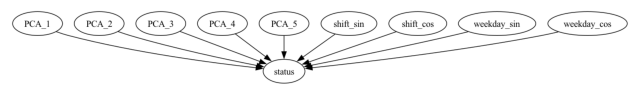

/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a futu

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
               d                          
───────────────────────────────(E[status])
d[PCA₁  PCA₂  PCA₃  PCA₄  PCA₅]           
Estimand assumption 1, Unconfoundedness: If U→{PCA_1,PCA_2,PCA_3,PCA_4,PCA_5} and U→status then P(status|PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,,U) = P(status|PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,)

## Realized estimand
b: status~PCA_1+PCA_2+PCA_3+PCA_4+PCA_5+PCA_1*shift_cos+PCA_1*shift_sin+PCA_1*weekday_cos+PCA_1*weekday_sin+PCA_2*shift_cos+PCA_2*shift_sin+PCA_2*weekday_cos+PCA_2*weekday_sin+PCA_3*shift_cos+PCA_3*shift_sin+PCA_3*weekday_cos+PCA_3*weekday_sin+PCA_4*shift_cos+PCA_4*shift_sin+PCA_4*weekday_cos+PCA_4*weekday_sin+PCA_5*shift_cos+PCA_5*shift_sin+PCA_5*weekday_cos+PCA_5*weekday_sin
Target units: 

## Estimate
Mean value: 1.992979076769626e-35
### Conditional Estimates
__categorical__shift_cos                  

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import dowhy
import matplotlib.pyplot as plt

# Assume 'df' is your dataframe with 400 sensors plus other features

# Separate sensor data and non-sensor features (e.g., 'status', 'weekday', 'shift')
sensor_columns = [col for col in df.columns if 'sensor' in col]
non_sensor_columns = ['status', 'weekday_sin', 'weekday_cos', 'shift_sin', 'shift_cos']

# Select only the sensor columns for PCA
sensor_data = df[sensor_columns]

# Apply PCA to reduce sensor dimensions
pca = PCA(n_components=5)  # Reduce to 5 components (adjust as needed)
reduced_sensor_data = pca.fit_transform(sensor_data)

# Add the reduced sensors back to the dataframe
reduced_sensor_df = pd.DataFrame(reduced_sensor_data, columns=[f'PCA_{i+1}' for i in range(reduced_sensor_data.shape[1])])

# Combine with the non-sensor columns
df_reduced = pd.concat([df[non_sensor_columns], reduced_sensor_df], axis=1)

# Define causal graph with the reduced features
causal_graph = """
digraph {
    PCA_1 -> status;
    PCA_2 -> status;
    PCA_3 -> status;
    PCA_4 -> status;
    PCA_5 -> status;
    shift_sin -> status;
    shift_cos -> status;
    weekday_sin -> status;
    weekday_cos -> status;
}
"""

# Create the CausalModel object
model = dowhy.CausalModel(
    data=df_reduced,
    graph=causal_graph,
    treatment=["PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5"],
    outcome=["status"]
)

# Visualize the causal graph
model.view_model()

# Estimate the causal effect with backdoor adjustment (without propensity score matching)
identified_estimand = model.identify_effect()
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Print the causal estimate
print(causal_estimate)



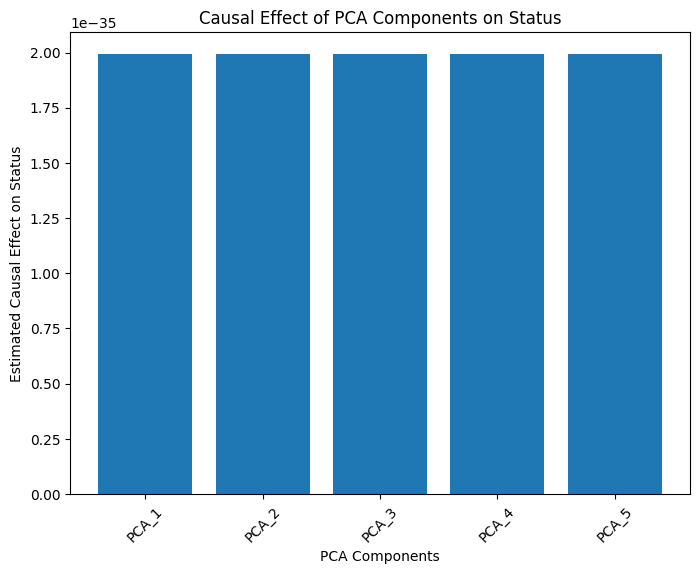

In [15]:
import matplotlib.pyplot as plt

# Extract the estimated causal effect for each PCA component
pca_components = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5']
estimated_effect = [causal_estimate.value for _ in pca_components]  # Just using the mean effect, as example

# Plot the causal effect estimates
plt.figure(figsize=(8, 6))
plt.bar(pca_components, estimated_effect)
plt.xlabel('PCA Components')
plt.ylabel('Estimated Causal Effect on Status')
plt.title('Causal Effect of PCA Components on Status')
plt.xticks(rotation=45)
plt.show()


2024-12-01 21:54:06.173 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 21:54:06.494 
  command:

    streamlit run /Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-01 21:54:06.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 21:54:06.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 21:54:06.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

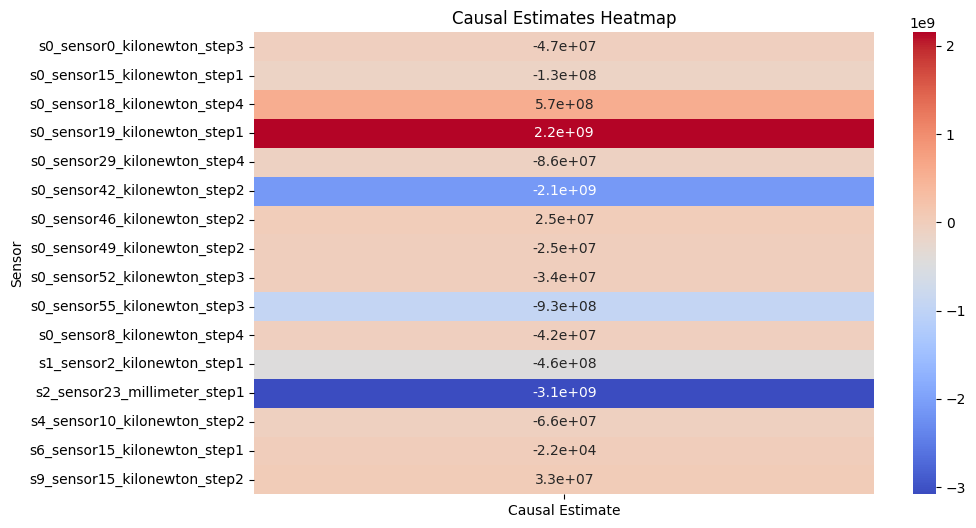

In [16]:
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt
from dowhy import CausalModel

# Assuming 'df' is your dataframe with 'status' as the outcome column
sensor_columns = [col for col in df.columns if 'sensor' in col]
common_causes = ['weekday_sin', 'weekday_cos', 'shift_sin', 'shift_cos']

significant_estimations = []

effect_threshold = 0.1  # Threshold for significance

st.title('Causal Estimates from Sensor Data')

for sensor in sensor_columns:
    st.subheader(f"Evaluating treatment: {sensor}")
    
    model = CausalModel(
        data=df,
        treatment=[sensor],
        outcome='status',
        common_causes=common_causes
    )
    
    identified_estimand = model.identify_effect()
    
    causal_estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )
    
    if abs(causal_estimate.value) > effect_threshold:
        significant_estimations.append((sensor, causal_estimate.value))

if significant_estimations:
    st.write("### Significant Causal Estimates (Above Threshold):")
    for sensor, estimate in significant_estimations:
        st.write(f"{sensor}: {estimate:.4f}")
    
    # Heatmap of causal estimates
    st.subheader("Causal Estimates Heatmap")
    estimate_df = pd.DataFrame(significant_estimations, columns=['Sensor', 'Causal Estimate'])
    
    # Pivot the data for the heatmap
    heatmap_data = estimate_df.pivot_table(index="Sensor", values="Causal Estimate", aggfunc="mean")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", ax=ax)
    ax.set_title("Causal Estimates Heatmap")
    st.pyplot(fig)
else:
    st.write("No significant causal estimates found above the threshold.")


In [17]:
significant_estimations

[('s0_sensor0_kilonewton_step3', -46963142.046524525),
 ('s0_sensor8_kilonewton_step4', -42366415.02487373),
 ('s1_sensor2_kilonewton_step1', -462604584.309041),
 ('s0_sensor15_kilonewton_step1', -127103028.91472435),
 ('s0_sensor18_kilonewton_step4', 572896824.8073444),
 ('s0_sensor19_kilonewton_step1', 2154179419.9948587),
 ('s9_sensor15_kilonewton_step2', 33332423.469028473),
 ('s6_sensor15_kilonewton_step1', -21959.40561360668),
 ('s0_sensor29_kilonewton_step4', -86239470.15094924),
 ('s4_sensor10_kilonewton_step2', -65567240.03350663),
 ('s0_sensor42_kilonewton_step2', -2117725051.415391),
 ('s0_sensor46_kilonewton_step2', 25022774.968631268),
 ('s0_sensor49_kilonewton_step2', -25131262.968805075),
 ('s0_sensor52_kilonewton_step3', -34150157.541154504),
 ('s0_sensor55_kilonewton_step3', -933341949.5421686),
 ('s2_sensor23_millimeter_step1', -3082536160.8403378)]

In [18]:
significant_sensors = [sensor for sensor, _ in significant_estimations]
significant_sensors

['s0_sensor0_kilonewton_step3',
 's0_sensor8_kilonewton_step4',
 's1_sensor2_kilonewton_step1',
 's0_sensor15_kilonewton_step1',
 's0_sensor18_kilonewton_step4',
 's0_sensor19_kilonewton_step1',
 's9_sensor15_kilonewton_step2',
 's6_sensor15_kilonewton_step1',
 's0_sensor29_kilonewton_step4',
 's4_sensor10_kilonewton_step2',
 's0_sensor42_kilonewton_step2',
 's0_sensor46_kilonewton_step2',
 's0_sensor49_kilonewton_step2',
 's0_sensor52_kilonewton_step3',
 's0_sensor55_kilonewton_step3',
 's2_sensor23_millimeter_step1']

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separate features (X) and target (y)
X = df[significant_sensors]
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Fit the model
model.fit(X_train, y_train)

/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:54:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9480142793395805
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       466
         1.0       0.95      1.00      0.97      8498

    accuracy                           0.95      8964
   macro avg       0.47      0.50      0.49      8964
weighted avg       0.90      0.95      0.92      8964



/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [21]:
df_imputed

,message_timestamp,status,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,...,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,physical_part_type_type2,physical_part_type_type4,weekday_sin,weekday_cos,shift_sin,shift_cos
0,1.725228e+09,1.0,4606.469076,19.525688,374.198570,8858.706709,36.836737,28705.766208,-53.537243,18.009638,...,217.244319,0.0,727.488871,28.207390,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
1,1.725228e+09,1.0,5886.043819,17.540378,360.603884,8851.987083,36.836737,27013.209239,-53.537243,20.258647,...,225.185946,0.0,741.645333,25.441928,1.0,0.0,0.000000,1.00000,-0.866025,-0.5
2,1.725228e+09,1.0,4606.469076,20.445584,371.689206,8856.466834,36.836737,33241.818888,-53.537243,18.686098,...,223.404646,0.0,721.249812,25.441928,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
3,1.725229e+09,1.0,4606.469076,20.822377,372.461318,8854.226959,36.836737,32564.796100,-53.537243,15.347726,...,219.470943,0.0,716.725583,26.253564,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
4,1.725229e+09,1.0,4606.469076,18.592800,373.371307,8851.987083,36.836737,32835.605215,-53.537243,21.242588,...,240.178550,0.0,775.029771,21.271151,0.0,0.0,0.000000,1.00000,-0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44813,1.732496e+09,1.0,5886.043819,19.411351,352.800037,8887.825088,36.836737,30262.918621,-53.537243,18.818841,...,219.956968,0.0,813.631668,24.508053,1.0,0.0,0.781831,0.62349,-0.866025,-0.5
44814,1.732496e+09,1.0,5886.043819,17.181774,336.861440,8892.304838,36.836737,32158.582427,-53.537243,18.818841,...,219.956968,0.0,805.203466,23.274894,1.0,0.0,0.781831,0.62349,-0.866025,-0.5
44815,1.732496e+09,1.0,4606.469076,17.298710,350.345824,8887.825088,36.836737,30872.239130,-53.537243,18.818841,...,219.956968,0.0,778.897258,25.138601,0.0,0.0,0.781831,0.62349,-0.866025,-0.5
44816,1.732496e+09,0.0,5886.043819,19.541280,361.348420,8885.585212,36.836737,30127.514063,-53.537243,18.818841,...,219.956968,0.0,728.546957,22.790479,1.0,0.0,0.781831,0.62349,-0.866025,-0.5


In [22]:
import numpy as np
import pandas as pd

# Assuming train_data is your DataFrame
df = pd.read_csv('test.csv')

# Step 1: One-Hot Encoding for 'physical_part_type'
df = pd.get_dummies(df, columns=['physical_part_type'], drop_first=True)

# Step 2: Convert 'message_timestamp' to seconds since epoch
df['message_timestamp'] = pd.to_datetime(df['message_timestamp'])
df['message_timestamp'] = df['message_timestamp'].astype(np.int64) // 10**9  # Convert to seconds since epoch

# Step 3: Cyclic Encoding for 'weekday'
# Map weekday names to numerical values (Sunday = 0, Monday = 1, ..., Saturday = 6)
weekday_map = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
               'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df['weekday'] = df['weekday'].map(weekday_map)

# Cyclic encoding for weekday
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

# Step 4: Cyclic Encoding for 'shift'
# Map shifts to numerical values (Fruehschicht = 0, Spaetschicht = 1, Nachtschicht = 2)
shift_map = {'Fruehschicht': 0, 'Spaetschicht': 1, 'Nachtschicht': 2}
df['shift'] = df['shift'].map(shift_map)

# Cyclic encoding for shift (3 unique shifts)
df['shift_sin'] = np.sin(2 * np.pi * df['shift'] / 3)
df['shift_cos'] = np.cos(2 * np.pi * df['shift'] / 3)

# Step 5: Remove 'physical_part_id' column
df = df.drop(columns=['weekday', 'shift'])


In [24]:
df

,message_timestamp,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,...,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,physical_part_type_type2,weekday_sin,weekday_cos,shift_sin,shift_cos
0,1725567968,gAAAAABnRuZgAoqNQjjoDuu0E4cO57PH72_QhklYwH70PT...,5886.043819,20.500154,409.826024,8838.547832,36.836737,33512.628003,-53.537243,15.901193,...,35409.760002,221.697568,0.0,811.004696,24.816343,True,-0.433884,-0.900969,0.866025,-0.5
1,1731977120,gAAAAABnRuZfDJPc3QznWGhN3RJVNfzbiTXh4Mg_64bl0r...,4606.469076,19.151494,344.499833,8883.345337,36.836737,32903.307494,NaN,17.965712,...,33466.541465,213.310616,0.0,723.767327,25.111728,False,0.974928,-0.222521,-0.866025,-0.5
2,1729611932,gAAAAABnRuZiFBOFlikwT7VY_tyGwj1To3zDBKCRcThbej...,4606.469076,23.660020,426.702187,8872.145961,36.836737,32023.177869,NaN,19.582187,...,34186.252034,218.283410,0.0,785.282260,23.930045,False,0.974928,-0.222521,0.866025,-0.5
3,1725454415,gAAAAABnRuZgQscFSxXX4gZ1XsENzHZeEDOji7vbzecJ2w...,4606.469076,19.738771,383.629367,8843.027582,36.836737,32023.177869,NaN,18.000853,...,34186.252034,217.244319,0.0,818.046441,21.733515,False,0.433884,-0.900969,0.000000,1.0
4,1732051028,gAAAAABnRuZhkoAxb0tnVyEOCy2xo_FRpNNe8P-yIXnXcX...,4606.469076,20.157142,341.383810,8887.825088,36.836737,29856.704948,NaN,21.523714,...,34618.078376,213.310616,0.0,843.732391,24.181328,False,0.974928,-0.222521,0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1732199361,gAAAAABnRuZfbU1Nc4VEVVevYCVW3pN1qfFy7lH-zi6Uhx...,5886.043819,21.950158,348.884327,8887.825088,36.836737,30669.132293,-53.537243,19.459194,...,33826.396750,220.806918,0.0,740.660218,24.233514,True,-0.433884,-0.900969,0.866025,-0.5
396,1728871848,gAAAAABnRuZgDRsDMYAI3pIqDLriGs9f2roKMUnRp8TcdQ...,4606.469076,19.284021,378.031555,8876.625711,36.836737,32632.498378,NaN,19.336202,...,34186.252034,211.158212,0.0,701.620492,20.749795,False,0.781831,0.623490,-0.866025,-0.5
397,1732062745,gAAAAABnRuZhsqXf7shn2vhIo16WiIGjxKAx4MsnN4ErU9...,4606.469076,20.669061,336.778713,8881.105462,36.836737,32429.391542,NaN,18.062349,...,32530.917725,213.384837,0.0,772.548742,24.816343,False,0.433884,-0.900969,-0.866025,-0.5
398,1729462395,gAAAAABnRuZhJFlAF6squ3i4u8ytxw8lpgIE-uHloPX7Gw...,5886.043819,17.974339,377.893678,8863.186460,36.836737,33512.628003,-53.537243,19.757891,...,35481.731059,216.353669,0.0,756.458537,25.727954,True,0.000000,1.000000,-0.866025,-0.5


In [29]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

# Load train and test data
train_df = df_imputed  # Assuming this is your preprocessed training dataset
test_df = pd.read_csv('test.csv')  # Replace with the correct path to your test data

# Separate features (X) and target (y) for the training data
X_train = train_df.drop('status', axis=1)
y_train = train_df['status']

# Prepare test features
X_test = df

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Add predictions to the test dataframe
test_df['status'] = y_pred


/Users/mahammadalirzayev/Desktop/BMW/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:07:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:physical_part_id: object

In [ ]:
final_df=pd.DataFrame(X_test['physical_part_id'])
final_df['status']=y_pred
final_df.to_csv("predictions.csv",index=False)
final_df